In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from numpy import log
import shutil
import sys
import os.path
#from pyomo.environ import *
import pyomo.environ as pe
import pyomo.opt as po



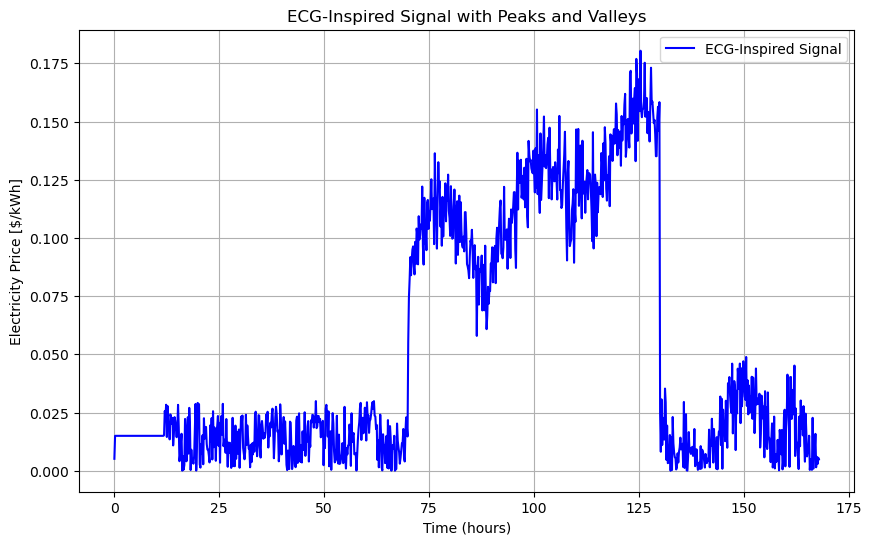

In [2]:
# Generate time values from 0 to 168 hours with 10-minute intervals
total_hours = 168
interval_minutes = 10
interval_hours = interval_minutes / 60
time_values = np.arange(0, total_hours, interval_hours)
time_indices = set(range(1, len(time_values) + 1))

# Generate a sinusoidal function for a regular pattern
regular_pattern = 0.02 * np.sin(2 * np.pi * time_values / 24)

# Add random noise for irregularities (peaks and valleys)
irregularities = np.random.normal(0, 0.01, len(time_values))

# Set average values for different time intervals
average_values = np.zeros_like(time_values)
average_values[(time_values >= 1) & (time_values < 70)] = 0.03
average_values[(time_values >= 70) & (time_values < 90)] = 0.098
average_values[(time_values >= 90) & (time_values < 110)] = 0.115
average_values[(time_values >= 110) & (time_values < 130)] = 0.14
average_values[(time_values >= 130) & (time_values < 150)] = 0.013
average_values[(time_values >= 150) & (time_values < 160)] = 0.0120

# Create the ECG-inspired signal with specified averages
ecg_signal = regular_pattern + irregularities + average_values

# Apply conditions
for i in time_indices:
    if ecg_signal[i-1] < 0:
        ecg_signal[i-1] = -ecg_signal[i-1]

for i in time_indices:
    if time_values[i-1] < 70 and ecg_signal[i] > 0.030:
        ecg_signal[i] = ecg_signal[i] - 0.055

for i in range(1, 71):
    ecg_signal[i] = 0.015

# Add offset
ecg_signal = ecg_signal +0
for i in time_indices:
    if ecg_signal[i-1] < 0:
        ecg_signal[i-1] = -ecg_signal[i-1]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time_values, ecg_signal, label='ECG-Inspired Signal', color='blue')

# Set plot labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Electricity Price [$/kWh]')
plt.title('ECG-Inspired Signal with Peaks and Valleys')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

######## ##########################################################################################
